# TASK 6.5 - Unsupervised Machine Learning: Clustering

#### Table of Content

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. The Elbow Technique
5. K-means Clustering
6. Descriptive Statistics
7. Exporting Data

# 1. Importing Libraries & Options

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Removing the max column cap

pd.options.display.max_columns = None

# 2. Importing Dataframe

In [4]:
# Creating a path for main dataframe

path = '/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis/02 Data'

In [5]:
# Importing dataframe

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'listings_clean.csv'), index_col = False)

# 3. Checking the Data

In [6]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,54730,2009-11-16,within a few hours,100,85,f,3.0,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,2,1 shared bath,1.0,1.76,65.0,1,29,t,26,56,86,361,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,2,1,1,0,0.16
1,15400,60302,2009-12-05,within a day,67,50,f,1.0,t,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.00,75.0,3,50,t,0,0,0,4,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,1,1,0,0,0.61
2,17402,67564,2010-01-04,within an hour,80,70,f,18.0,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.00,265.0,4,365,t,4,34,60,295,43,1,0,2011-03-21,2021-06-28,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,1,1,0,0,0.33
3,17506,67915,2010-01-05,Unknown,89,75,f,3.0,t,t,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.00,150.0,3,21,t,29,59,89,364,0,0,0,1900-01-01,1900-01-01,4.54,4.73,4.62,4.79,4.80,4.75,4.64,f,2,0,2,0,4.64
4,25123,103583,2010-04-05,Unknown,89,75,f,3.0,t,t,Barnet,51.57438,-0.21081,Private room in residential home,Private room,2,1.5 shared baths,1.0,1.76,29.0,10,1120,t,0,0,0,0,129,0,0,2010-04-14,2020-03-15,4.78,4.70,4.94,4.91,4.89,4.45,4.74,t,3,0,3,0,0.91


In [7]:
df.shape

(66582, 45)

In [8]:
# Dropping all non-numerical data

df_num = df.drop(columns = ['host_id', 'host_since', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'has_availability', 'first_review', 'last_review', 'instant_bookable'])

In [9]:
df_num.shape

(66582, 31)

In [10]:
df_num.head()

,id,host_resp_rate_pct,host_accept_rate_pct,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price_usd,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,100,85,3.0,51.56861,-0.11270,2,1.0,1.76,65.0,1,29,26,56,86,361,22,1,1,4.86,4.80,4.85,4.80,4.90,4.65,4.75,2,1,1,0,0.16
1,15400,67,50,1.0,51.48780,-0.16813,2,1.0,1.00,75.0,3,50,0,0,0,4,89,0,0,4.79,4.84,4.88,4.87,4.82,4.93,4.73,1,1,0,0,0.61
2,17402,80,70,18.0,51.52195,-0.14094,6,3.0,3.00,265.0,4,365,4,34,60,295,43,1,0,4.69,4.80,4.68,4.66,4.66,4.85,4.59,1,1,0,0,0.33
3,17506,89,75,3.0,51.47935,-0.19743,2,1.0,1.00,150.0,3,21,29,59,89,364,0,0,0,4.54,4.73,4.62,4.79,4.80,4.75,4.64,2,0,2,0,4.64
4,25123,89,75,3.0,51.57438,-0.21081,2,1.0,1.76,29.0,10,1120,0,0,0,0,129,0,0,4.78,4.70,4.94,4.91,4.89,4.45,4.74,3,0,3,0,0.91


# 4. The Elbow Technique 

In [11]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

[-1.7324218283142283e+19,
 -5.271531567646487e+18,
 -3.180927831296284e+18,
 -2.018437769122111e+18,
 -1.113627677504141e+18,
 -7.489526328713701e+17,
 -5.523174487420606e+17,
 -4.3113341391757786e+17,
 -3.182185256944969e+17]

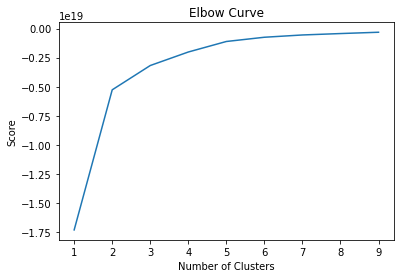

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  COMMENT: There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is three.

# 5. K-means Clustering

In [14]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [16]:
df_num['clusters'] = kmeans.fit_predict(df_num)

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [17]:
df_num.head()

,id,host_resp_rate_pct,host_accept_rate_pct,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price_usd,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,clusters
0,13913,100,85,3.0,51.56861,-0.11270,2,1.0,1.76,65.0,1,29,26,56,86,361,22,1,1,4.86,4.80,4.85,4.80,4.90,4.65,4.75,2,1,1,0,0.16,2
1,15400,67,50,1.0,51.48780,-0.16813,2,1.0,1.00,75.0,3,50,0,0,0,4,89,0,0,4.79,4.84,4.88,4.87,4.82,4.93,4.73,1,1,0,0,0.61,2
2,17402,80,70,18.0,51.52195,-0.14094,6,3.0,3.00,265.0,4,365,4,34,60,295,43,1,0,4.69,4.80,4.68,4.66,4.66,4.85,4.59,1,1,0,0,0.33,2
3,17506,89,75,3.0,51.47935,-0.19743,2,1.0,1.00,150.0,3,21,29,59,89,364,0,0,0,4.54,4.73,4.62,4.79,4.80,4.75,4.64,2,0,2,0,4.64,2
4,25123,89,75,3.0,51.57438,-0.21081,2,1.0,1.76,29.0,10,1120,0,0,0,0,129,0,0,4.78,4.70,4.94,4.91,4.89,4.45,4.74,3,0,3,0,0.91,2


In [18]:
df_num['clusters'].value_counts()

0    24486
1    23192
2    18904
Name: clusters, dtype: int64

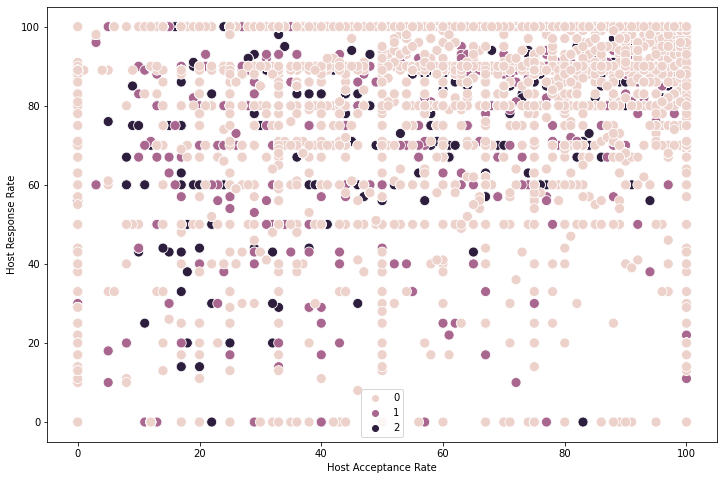

In [19]:
# Ploting the clusters for the host acceptance rate vs host reponse rate variables
# It's a mess and there are no distinct groups..!

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['host_accept_rate_pct'], y=df_num['host_resp_rate_pct'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Host Acceptance Rate') 
plt.ylabel('Host Response Rate') 
plt.show()

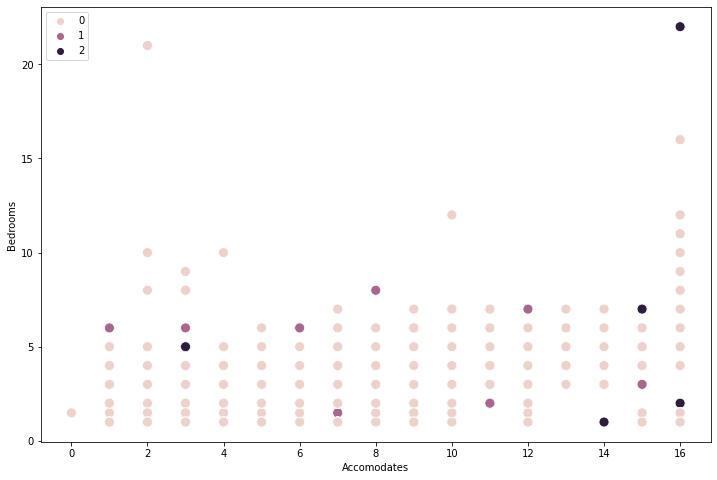

In [20]:
# Ploting the clusters for bedrooms vs accomodates variables
# Here the data is more organised but still no proper cluster groups appearing

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['accommodates'], y=df_num['bedrooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Accomodates') 
plt.ylabel('Bedrooms') 
plt.show()

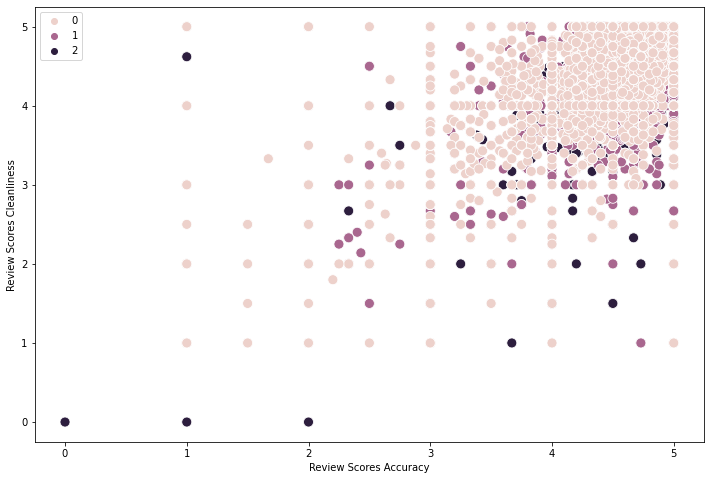

In [21]:
# Ploting the clusters for the review scores accuracy vs review scores clealiness variables
# Here is a little bit more organised into groups but still nothing useful (star shaped data?)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['review_scores_accuracy'], y=df_num['review_scores_cleanliness'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Review Scores Accuracy') 
plt.ylabel('Review Scores Cleanliness') 
plt.show()

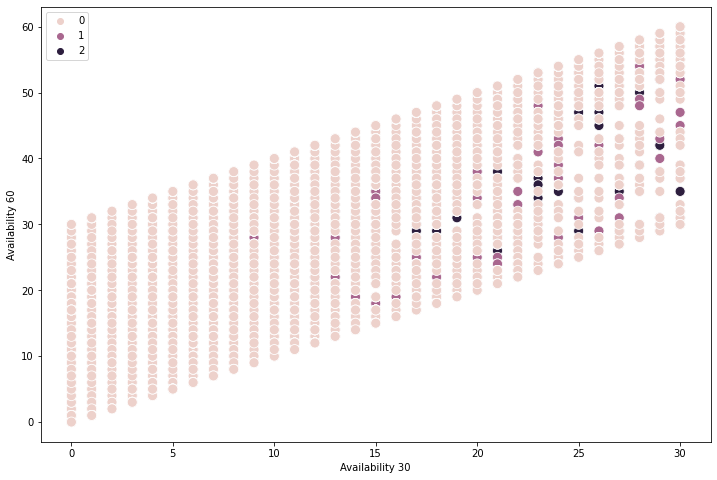

In [22]:
# Ploting the clusters for the availability 30 vs availability 60 variables
# A nice shape, but still no groups. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['availability_30'], y=df_num['availability_60'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Availability 30') 
plt.ylabel('Availability 60') 
plt.show()

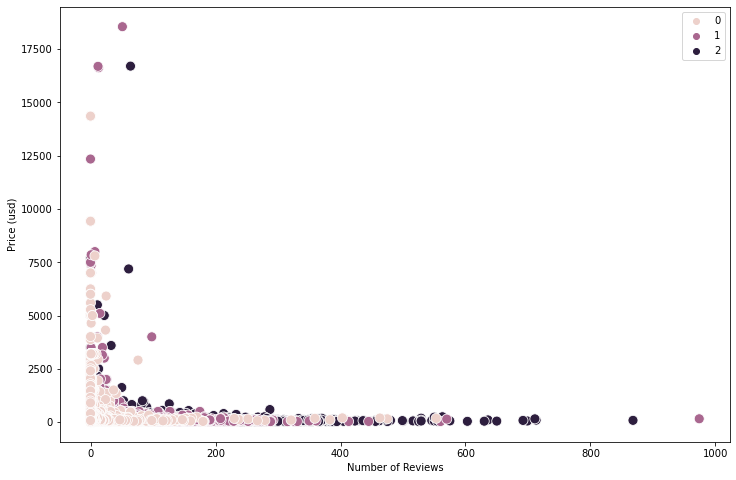

In [24]:
# Ploting the clusters for the number of reviews vs price variables
# Some very slight grouping appearing here

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['number_of_reviews'], y=df_num['price_usd'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of Reviews') 
plt.ylabel('Price (usd)') 
plt.show()

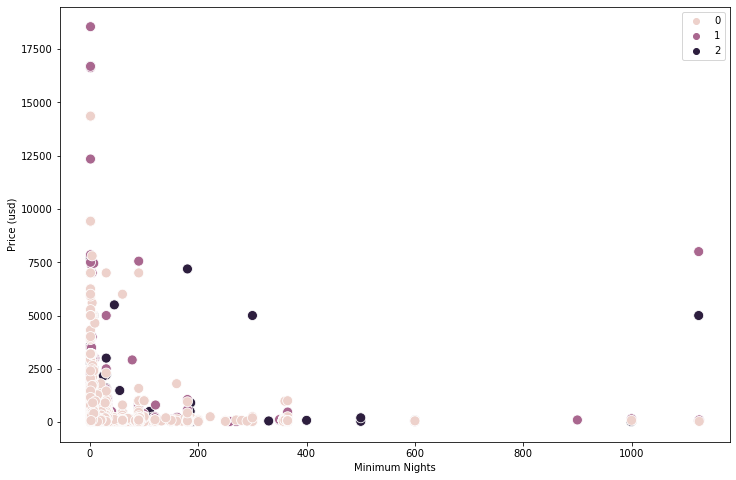

In [25]:
# Ploting the clusters for the minimum nights vs price variables
# Some very slight grouping appearing here

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['minimum_nights'], y=df_num['price_usd'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Minimum Nights') 
plt.ylabel('Price (usd)') 
plt.show()

### COMMENT: 

> I feel like the clusters don't make much sense. From my understanding, this means there are no groups in the data. 

# 6. Descriptive Statistics

In [23]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df_num.groupby('cluster').agg(['mean', 'median', 'max', 'min'])

id                                 host_resp_rate_pct  \
                     mean      median       max       min               mean   
cluster                                                                        
dark purple  4.553132e+07  45628961.5  53713050  35712499          89.804501   
pink         2.587732e+07  25283976.5  35708457  17657876          88.589686   
purple       9.420707e+06   9603032.0  17654391     13913          88.525709   

                            host_accept_rate_pct                  \
            median  max min                 mean median  max min   
cluster                                                            
dark purple   90.0  100   0            78.081598   75.0  100   0   
pink          89.0  100   0            74.932218   75.0  100   0   
purple        89.0  100   0            71.533379   75.0  100   0   

            host_listings_count                       latitude             \
                           mean median     max  min       mean     median   
cluster                                                                     
dark purple          133.994609    1.0  3750.0  0.0  51.509383  51.513070   
pink                  32.292860    1.0  1185.0  0.0  51.509221  51.513570   
purple                15.558665    1.0  1185.0  0.0  51.510387  51.515625   

                                 longitude                              \
                  max        min      mean    median      max      min   
cluster                                                                  
dark purple  51.67422  51.295937 -0.129569 -0.131030  0.27896 -0.49616   
pink         51.67983  51.297710 -0.126018 -0.122330  0.28857 -0.48410   
purple       51.67600  51.296850 -0.128118 -0.119475  0.24692 -0.48654   

            accommodates                 bedrooms                        beds  \
                    mean median max min      mean median   max  min      mean   
cluster                                                                         
dark purple     3.036143    2.0  16   0  1.503827    1.0  21.0  1.0  1.795478   
pink            3.060495    2.0  16   1  1.509575    1.0  12.0  1.0  1.767528   
purple          2.897535    2.0  16   1  1.445652    1.0  22.0  1.0  1.698254   

                                price_usd                      minimum_nights  \
            median   max  min        mean median      max  min           mean   
cluster                                                                         
dark purple    1.0  38.0  1.0  189.171853   98.0  14360.0  0.0       8.522176   
pink           1.0  29.0  1.0  130.911607   80.0  18557.0  7.0       5.248491   
purple         1.0  19.0  1.0  106.000688   75.0  16706.0  8.0       5.962812   

                             maximum_nights                         \
            median   max min           mean  median        max min   
cluster                                                              
dark purple    2.0  1125   1     639.999837   365.0       1125   1   
pink           2.0  1125   1    1016.483399  1125.0    9000000   1   
purple         2.0  1124   1   81883.346276  1125.0  999999999   1   

            availability_30                availability_60                 \
                       mean median max min            mean median max min   
cluster                                                                     
dark purple        9.268643    4.0  30   0       23.037246   17.0  60   0   
pink               5.034926    0.0  30   0       12.597534    0.0  60   0   
purple             4.312844    0.0  30   0       11.193980    0.0  60   0   

            availability_90                availability_365                  \
                       mean median max min             mean median  max min   
cluster                                                                       
dark purple       37.916850   35.0  90   0       139.658049   87.0  365   0   
pink              20.929286    0.0  90   0        7

### COMMENT: 

> It looks like 3 randomized groups, with similar attributes. Maybe I have too many variables? 

> I'm not sure if the dataset present no interesting groups and/or correlations, or if I haven't found them. There are many variables, but maybe it would be worth building profiles of similar Airbnbs before looking for further correlations. Also I feel like some of the categorical variables could present interesting findings, but are not being used through these regression analysis & k-means clusterings. 



# 7. Exporting Data

In [34]:
df_num['clusters'].value_counts()

0    24486
1    23192
2    18904
Name: clusters, dtype: int64

In [37]:
# Exporting dataframe as it contains the cluster flag

df_num.to_csv(os.path.join(path, 'Prepared Data', 'listings_clusters.csv'), index=False)